In [7]:
#%matplotlib inline
import pandas as pd

pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
import json

In [8]:
df = pd.read_pickle('../data/processed/linear_regression.pkl')
DIMENSION_E0 = len(df.at[0, 'one_hot_encode_forward'])
DIMENSION_E = len(df.at[0, 'energy_encode_start'])


df = df[df['migration_barriers'] < 1.1]
print(f'Dimensionality {DIMENSION_E0} {DIMENSION_E}')

Dimensionality 1521 42


In [21]:
df

,index,migration_atom,migration_barriers,energy_difference,e0,energy_start,energy_end,one_hot_encode_forward,one_hot_encode_backward,energy_encode_start,energy_encode_end
1232,616,Mg,0.566898,0.123390,0.505203,-835.222815,-835.099425,"[0.0, 0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, ...","[0.0, 0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, ...","[1085.0, 128.0, 162.0, 46.0, 75.0, 28.0, 535.0...","[1085.0, 127.0, 162.0, 44.0, 78.0, 28.0, 535.0..."
1254,627,Zn,0.525693,-0.202201,0.626794,-859.667602,-859.869804,"[0.0, 0.75, 0.25, 0.0, 0.5, 0.5, 0.0, 0.0, 1.0...","[0.0, 0.75, 0.25, 0.0, 0.5, 0.5, 0.0, 0.0, 1.0...","[1182.0, 104.0, 111.0, 33.0, 63.0, 31.0, 583.0...","[1182.0, 104.0, 111.0, 33.0, 65.0, 29.0, 583.0..."
3831,1915,Al,0.000311,-0.151733,0.076178,-876.317490,-876.469223,"[0.5, 0.25, 0.25, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0...","[0.5, 0.25, 0.25, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0...","[1198.0, 153.0, 120.0, 14.0, 31.0, 8.0, 600.0,...","[1198.0, 155.0, 118.0, 14.0, 31.0, 8.0, 601.0,..."
2592,1296,Zn,0.206726,-0.097093,0.255273,-935.854827,-935.951920,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[1430.0, 47.0, 47.0, 0.0, 0.0, 0.0, 726.0, 12....","[1430.0, 47.0, 46.0, 0.0, 1.0, 0.0, 726.0, 12...."
2726,1363,Al,0.592766,-0.077183,0.631357,-918.451552,-918.528735,"[0.5, 0.5, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1353.0, 153.0, 0.0, 18.0, 0.0, 0.0, 687.0, 55...","[1352.0, 154.0, 0.0, 18.0, 0.0, 0.0, 687.0, 55..."
...,...,...,...,...,...,...,...,...,...,...,...
3413,1706,Al,0.164761,-0.055408,0.192465,-879.606581,-879.661989,"[0.75, 0.0, 0.25, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0...","[0.75, 0.0, 0.25, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0...","[1201.0, 187.0, 89.0, 22.0, 20.0, 5.0, 604.0, ...","[1202.0, 187.0, 88.0, 22.0, 20.0, 5.0, 607.0, ..."
3463,1731,Al,0.501788,0.112318,0.445629,-878.712297,-878.599979,"[0.5, 0.25, 0.25, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0...","[0.5, 0.25, 0.25, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0...","[1204.0, 147.0, 126.0, 12.0, 30.0, 5.0, 604.0,...","[1202.0, 148.0, 127.0, 12.0, 30.0, 5.0, 607.0,..."
3213,1606,Al,0.458341,-0.019423,0.468052,-917.083847,-917.103270,"[1.0, 0.0, 0.0, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, ...","[1360.0, 41.0, 107.0, 2.0, 3.0, 11.0, 691.0, 1...","[1362.0, 41.0, 105.0, 2.0, 3.0, 11.0, 692.0, 1..."
934,467,Al,0.399301,-0.133628,0.466115,-916.281401,-916.415029,"[0.5, 0.0, 0.5, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, ...","[0.5, 0.0, 0.5, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, ...","[1362.0, 0.0, 148.0, 0.0, 0.0, 14.0, 696.0, 0....","[1365.0, 0.0, 145.0, 0.0, 0.0, 14.0, 693.0, 0...."


In [22]:
df = df.sample(frac=1)
# df_copy = df.drop_duplicates(subset=['migration_atom', 'energy_start'])
df_copy = df

In [23]:
# TEST_SIZE = 100

# x_train, y_train = np.stack(df_copy[:-TEST_SIZE]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE]['energy_start'])

# df_train, df_test = df[:-TEST_SIZE], df[-TEST_SIZE:]

# x_train_Al, y_train_Al = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])
# x_train_Mg, y_train_Mg = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])
# x_train_Zn, y_train_Zn = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])


# x_test, y_test = np.stack(df_copy[-TEST_SIZE:]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE:]['energy_start'])

# x_test_Al, y_test_Al = np.stack(df_test['one_hot_encode_forward']), \
#                        np.array(df_test['e0'])
# x_test_Mg, y_test_Mg = np.stack(df_test['one_hot_encode_forward']), \
#                        np.array(df_test['e0'])
# x_test_Zn, y_test_Zn = np.stack(df_test['one_hot_encode_forward']), \
#                        np.array(df_test['e0'])

In [24]:
TEST_SIZE = 500

x_train, y_train = np.stack(df_copy[:-TEST_SIZE]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE]['energy_start'])

df_train, df_test = df[:-TEST_SIZE], df[-TEST_SIZE:]

x_train_Al, y_train_Al = np.stack(df_train[df_train['migration_atom'] == 'Al']['one_hot_encode_forward']), \
                         np.array(df_train[df_train['migration_atom'] == 'Al']['e0'])
x_train_Mg, y_train_Mg = np.stack(df_train[df_train['migration_atom'] == 'Mg']['one_hot_encode_forward']), \
                         np.array(df_train[df_train['migration_atom'] == 'Mg']['e0'])
x_train_Zn, y_train_Zn = np.stack(df_train[df_train['migration_atom'] == 'Zn']['one_hot_encode_forward']), \
                         np.array(df_train[df_train['migration_atom'] == 'Zn']['e0'])


x_test, y_test = np.stack(df_copy[-TEST_SIZE:]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE:]['energy_start'])

x_test_Al, y_test_Al = np.stack(df_test[df_test['migration_atom'] == 'Al']['one_hot_encode_forward']), \
                       np.array(df_test[df_test['migration_atom'] == 'Al']['e0'])
x_test_Mg, y_test_Mg = np.stack(df_test[df_test['migration_atom'] == 'Mg']['one_hot_encode_forward']), \
                       np.array(df_test[df_test['migration_atom'] == 'Mg']['e0'])
x_test_Zn, y_test_Zn = np.stack(df_test[df_test['migration_atom'] == 'Zn']['one_hot_encode_forward']), \
                       np.array(df_test[df_test['migration_atom'] == 'Zn']['e0'])

In [25]:
print(x_train.shape)
print(x_train_Al.shape)
print(x_train_Mg.shape)
print(x_train_Zn.shape)

(3882, 42)
(2235, 1521)
(802, 1521)
(845, 1521)


In [26]:
mu_x, mean_y = np.mean(x_train, axis=0), np.mean(y_train)
mu_x_Al, mean_y_Al = np.mean(x_train_Al, axis=0), np.mean(y_train_Al)
mu_x_Mg, mean_y_Mg = np.mean(x_train_Mg, axis=0), np.mean(y_train_Mg)
mu_x_Zn, mean_y_Zn = np.mean(x_train_Zn, axis=0), np.mean(y_train_Zn)

covariance = np.cov(x_train, rowvar=False)
covariance_Al = np.cov(x_train_Al, rowvar=False)
covariance_Mg = np.cov(x_train_Mg, rowvar=False)
covariance_Zn = np.cov(x_train_Zn, rowvar=False)

U, S, Uh = np.linalg.svd(covariance)
U_Al, S_Al, Uh_Al = np.linalg.svd(covariance_Al)
U_Mg, S_Mg, Uh_Mg = np.linalg.svd(covariance_Mg)
U_Zn, S_Zn, Uh_Zn = np.linalg.svd(covariance_Zn)

PCS Dimensionality Reduction
14 principal components are needed to represent 99.99% of the total variation
The percentage reduction in dimension is: 66.66666666666666%
PCS Dimensionality Reduction
500 principal components are needed to represent 99.99% of the total variation
The percentage reduction in dimension is: 67.12689020381329%
PCS Dimensionality Reduction
461 principal components are needed to represent 99.99% of the total variation
The percentage reduction in dimension is: 69.69099276791584%
PCS Dimensionality Reduction
476 principal components are needed to represent 99.99% of the total variation
The percentage reduction in dimension is: 68.70479947403024%


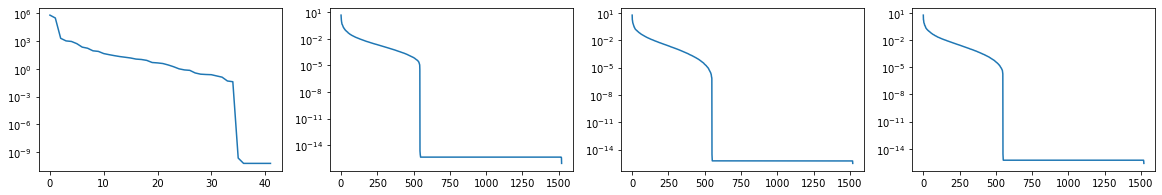

In [27]:
fig, axes = plt.subplots(1, 4, figsize=(20, 3))
axes[0].semilogy(np.arange(x_train.shape[1]), S)
axes[1].semilogy(np.arange(x_train_Al.shape[1]), S_Al)
axes[2].semilogy(np.arange(x_train_Mg.shape[1]), S_Mg)
axes[3].semilogy(np.arange(x_train_Zn.shape[1]), S_Zn)
##################################################################################################################
for S_it in (S, S_Al, S_Mg, S_Zn):
    sum_of_S = np.sum(S_it)
    PERCENT = 99.99
    for i in range(S_it.shape[0]):
        if np.sum(S_it[:i]) > PERCENT/100*sum_of_S:
            break
    print('PCS Dimensionality Reduction')
    print(i, f'principal components are needed to represent {PERCENT}% of the total variation')
    print(f'The percentage reduction in dimension is: {(S_it.shape[0]-i)/S_it.shape[0]*100}%')


In [28]:
NUM_FEATURES_1 = 42
NUM_FEATURES_2 = 130

In [29]:
x_train, y_train = x_train - mu_x, y_train - mean_y
x_test, y_test = x_test - mu_x, y_test - mean_y

x_train_Al, y_train_Al = (x_train_Al - mu_x_Al).dot(U_Al[:,:NUM_FEATURES_2]), y_train_Al - mean_y_Al
x_test_Al, y_test_Al = (x_test_Al - mu_x_Al).dot(U_Al[:,:NUM_FEATURES_2]), y_test_Al - mean_y_Al

x_train_Mg, y_train_Mg = (x_train_Mg - mu_x_Mg).dot(U_Mg[:,:NUM_FEATURES_2]), y_train_Mg - mean_y_Mg
x_test_Mg, y_test_Mg = (x_test_Mg - mu_x_Mg).dot(U_Mg[:,:NUM_FEATURES_2]), y_test_Mg - mean_y_Mg

x_train_Zn, y_train_Zn = (x_train_Zn - mu_x_Zn).dot(U_Zn[:,:NUM_FEATURES_2]), y_train_Zn - mean_y_Zn
x_test_Zn, y_test_Zn = (x_test_Zn - mu_x_Zn).dot(U_Zn[:,:NUM_FEATURES_2]), y_test_Zn - mean_y_Zn

In [30]:
lamd = 0.05
lamd_Al = 0.1
lamd_Mg = 0.1
lamd_Zn = 0.1

theta = np.dot(np.linalg.inv(np.dot(x_train.T, x_train) + lamd * np.identity(NUM_FEATURES_1)),
               x_train.T).dot(y_train)

theta_Al = np.dot(np.linalg.inv(np.dot(x_train_Al.T, x_train_Al) + lamd_Al * np.identity(NUM_FEATURES_2)),
                  x_train_Al.T).dot(y_train_Al)

theta_Mg = np.dot(np.linalg.inv(np.dot(x_train_Mg.T, x_train_Mg) + lamd_Mg * np.identity(NUM_FEATURES_2)),
                  x_train_Mg.T).dot(y_train_Mg)

theta_Zn = np.dot(np.linalg.inv(np.dot(x_train_Zn.T, x_train_Zn) + lamd_Zn * np.identity(NUM_FEATURES_2)),
                  x_train_Zn.T).dot(y_train_Zn)

In [31]:
def pred_energy_ls(row):
    return np.inner(theta, (np.asarray(row['energy_encode_start']) - mu_x)) + mean_y

def pred_e0_ls(row):
    if row['migration_atom'] == 'Al':
        return np.inner(theta_Al,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Al).dot(U_Al[:, :NUM_FEATURES_2])) + mean_y_Al
    elif row['migration_atom'] == 'Mg':
        return np.inner(theta_Mg,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Mg).dot(U_Mg[:, :NUM_FEATURES_2])) + mean_y_Mg
    elif row['migration_atom'] == 'Zn':
        return np.inner(theta_Zn,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Zn).dot(U_Zn[:, :NUM_FEATURES_2])) + mean_y_Zn
    else:
        raise RuntimeError('Unknown element')
        
def pred_de_ls(row):
    return np.inner(theta, (np.asarray(row['energy_encode_end']) - mu_x)) - np.inner(theta, (np.asarray(row['energy_encode_start']) - mu_x))

        
def pred_barrier_ls(row):
    return row['predicted_e0'] + 0.5*(np.inner(theta, (np.asarray(row['energy_encode_end']) - mu_x)) - np.inner(theta, (np.asarray(row['energy_encode_start']) - mu_x)))
                                                                                                               
df['predicted_energy'] = df.apply(lambda row: pred_energy_ls(row), axis=1)
df_train['predicted_energy'] = df_train.apply(lambda row: pred_energy_ls(row), axis=1)
df_test['predicted_energy'] = df_test.apply(lambda row: pred_energy_ls(row), axis=1)


df['predicted_e0'] = df.apply(lambda row: pred_e0_ls(row), axis=1)
df_train['predicted_e0'] = df_train.apply(lambda row: pred_e0_ls(row), axis=1)
df_test['predicted_e0'] = df_test.apply(lambda row: pred_e0_ls(row), axis=1)

df['predicted_de'] = df.apply(lambda row: pred_de_ls(row), axis=1)
df_train['predicted_de'] = df_train.apply(lambda row: pred_de_ls(row), axis=1)
df_test['predicted_de'] = df_test.apply(lambda row: pred_de_ls(row), axis=1)


df['predicted_barrier'] = df['e0'] + 0.5*df['predicted_de']
df_train['predicted_barrier'] = df_train['e0'] + 0.5*df_train['predicted_de']
df_test['predicted_barrier'] = df_test['e0'] + 0.5*df_test['predicted_de']

In [32]:
theta

array([-5.74241598e-02, -5.02565570e-02, -8.98677251e-04, -4.24420422e-02,
       -4.97891381e-02,  2.75879296e-02, -6.61143018e-02, -3.85928799e-02,
       -1.20812966e-03, -2.50234324e-02,  5.29950662e-02,  7.84106872e-02,
       -7.77366635e-05,  9.05694744e-03,  4.90262521e-02,  3.46803535e-02,
        6.06526433e-02,  7.41196597e-02, -1.85050661e-04,  1.49732029e-02,
        1.30532232e-02,  2.40075029e-02,  3.14026563e-03, -3.32183994e-03,
       -1.65174488e-02, -7.05486739e-03, -1.55551029e-02,  2.64713455e-02,
        3.58640647e-02,  6.95178088e-02,  6.27196395e-03,  1.70549044e-02,
        2.06731875e-03,  2.37447720e-02,  1.28155107e-02, -4.66423122e-02,
       -4.91421936e-03,  2.44729607e-02,  3.38987526e-03,  3.42192939e-02,
       -1.31311614e-02, -4.40366250e-02])

In [33]:
df

,index,migration_atom,migration_barriers,energy_difference,e0,energy_start,energy_end,one_hot_encode_forward,one_hot_encode_backward,energy_encode_start,energy_encode_end,predicted_energy,predicted_e0,predicted_de,predicted_barrier
4222,2111,Al,0.494730,-0.038296,0.513878,-937.095341,-937.133637,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1437.0, 70.0, 8.0, 5.0, 4.0, 0.0, 722.0, 28.0...","[1437.0, 70.0, 8.0, 5.0, 4.0, 0.0, 722.0, 28.0...",-936.929213,0.554425,0.146899,0.587327
72,36,Zn,0.366562,0.104931,0.314097,-896.003436,-895.898505,"[0.75, 0.0, 0.25, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0...","[0.75, 0.0, 0.25, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0...","[1302.0, 0.0, 174.0, 0.0, 0.0, 48.0, 660.0, 0....","[1302.0, 0.0, 170.0, 0.0, 0.0, 52.0, 660.0, 0....",-895.213350,0.239979,0.139027,0.383610
884,442,Mg,0.440037,0.071542,0.404266,-917.572620,-917.501078,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1362.0, 42.0, 106.0, 0.0, 4.0, 10.0, 696.0, 1...","[1362.0, 39.0, 106.0, 1.0, 6.0, 10.0, 696.0, 1...",-917.238622,0.368247,0.173229,0.490880
421,210,Zn,0.207299,0.031090,0.191754,-801.816231,-801.785141,"[0.0, 0.0, 1.0, 0.5, 0.0, 0.5, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 1.0, 0.5, 0.0, 0.5, 0.0, 0.0, 1.0, ...","[1032.0, 38.0, 202.0, 0.0, 104.0, 148.0, 512.0...","[1032.0, 38.0, 198.0, 0.0, 105.0, 151.0, 512.0...",-803.196443,0.198014,0.210809,0.297159
2604,1302,Mg,0.410167,0.054174,0.383080,-935.893652,-935.839478,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1432.0, 46.0, 46.0, 0.0, 0.0, 0.0, 726.0, 12....","[1432.0, 43.0, 46.0, 1.0, 2.0, 0.0, 726.0, 15....",-935.779239,0.406806,-0.025616,0.370272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,1501,Al,0.400363,-0.053045,0.426885,-920.866653,-920.919697,"[1.0, 0.0, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[1362.0, 146.0, 0.0, 16.0, 0.0, 0.0, 692.0, 52...","[1360.0, 148.0, 0.0, 16.0, 0.0, 0.0, 691.0, 53...",-920.676950,0.505903,0.122674,0.488222
4154,2077,Zn,0.216324,-0.115013,0.273830,-896.870944,-896.985956,"[0.5, 0.25, 0.25, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0...","[0.5, 0.25, 0.25, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0...","[1323.0, 28.0, 101.0, 2.0, 27.0, 43.0, 656.0, ...","[1323.0, 28.0, 106.0, 2.0, 25.0, 40.0, 656.0, ...",-897.295812,0.333703,-0.178607,0.184527
1544,772,Zn,0.274470,0.036917,0.256012,-892.915786,-892.878869,"[0.25, 0.0, 0.75, 0.5, 0.0, 0.5, 0.0, 0.0, 1.0...","[0.25, 0.0, 0.75, 0.5, 0.0, 0.5, 0.0, 0.0, 1.0...","[1286.0, 39.0, 146.0, 1.0, 18.0, 34.0, 638.0, ...","[1286.0, 39.0, 144.0, 1.0, 18.0, 36.0, 638.0, ...",-892.584629,0.277741,0.167568,0.339795
127,63,Al,0.676895,-0.084541,0.719166,-920.398980,-920.483521,"[0.75, 0.25, 0.0, 0.75, 0.25, 0.0, 1.0, 0.0, 0...","[0.75, 0.25, 0.0, 0.75, 0.25, 0.0, 1.0, 0.0, 0...","[1362.0, 146.0, 0.0, 16.0, 0.0, 0.0, 690.0, 54...","[1362.0, 146.0, 0.0, 16.0, 0.0, 0.0, 692.0, 52...",-920.616540,0.602448,-0.060411,0.688960


rmse train 0.5164358570048365
rmse train 0.5240483920879949


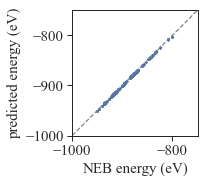

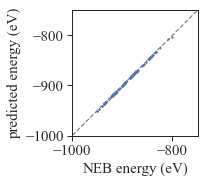

In [34]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [-1000, -750]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_train, legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'energy_start', 'predicted_energy', alpha=1, s=1, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('predicted energy (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB energy (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
#     ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

# g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df_train['energy_start'], df_train['predicted_energy'])))
##################################################
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [-1000, -750]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_test, legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'energy_start', 'predicted_energy', alpha=1, s=1, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('predicted energy (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB energy (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
#     ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

# g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df_test['energy_start'], df_test['predicted_energy'])))

rmse train 0.16495593926419777
rmse train 0.15515214184060927


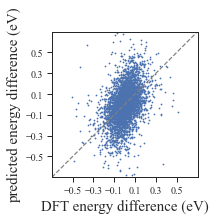

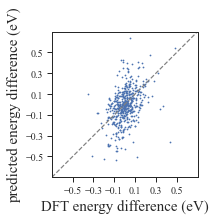

In [35]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 10, 'ytick.labelsize': 10, })

lim_range = [-0.7, 0.7]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_train, legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'energy_difference', 'predicted_de', alpha=1, s=1, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('predicted energy difference (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='DFT energy difference (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(-0.5, 0.7, 0.2), yticks=np.arange(-0.5, 0.7, 0.2))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

g.savefig('ediff_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df_train['energy_difference'], df_train['predicted_de'])))
###################################################
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 10, 'ytick.labelsize': 10, })

lim_range = [-0.7, 0.7]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_test, legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'energy_difference', 'predicted_de', alpha=1, s=1, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('predicted energy difference (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='DFT energy difference (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(-0.5, 0.7, 0.2), yticks=np.arange(-0.5, 0.7, 0.2))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

g.savefig('ediff_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df_test['energy_difference'], df_test['predicted_de'])))

rmse train 0.0321632469356207
rmse test 0.04828672903747258


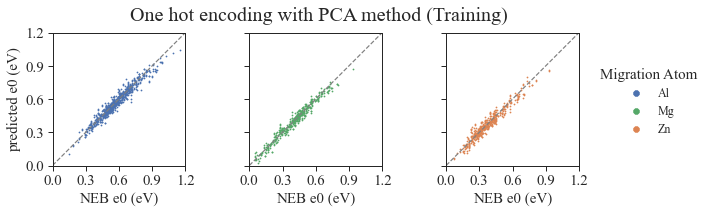

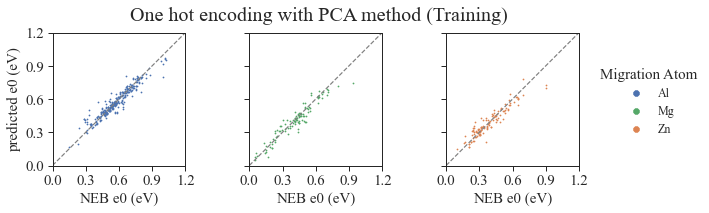

In [18]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_train, col='migration_atom', hue='migration_atom', legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'e0', 'predicted_e0', alpha=1, s=1, marker='8')
g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
                 scatterpoints=1, label_order=ele_list, prop={'size': 12})
g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('predicted e0 (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB e0 (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

# g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df_train['e0'], df_train['predicted_e0'])))

######
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_test, col='migration_atom', hue='migration_atom', legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'e0', 'predicted_e0', alpha=1, s=1, marker='8')
g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
                 scatterpoints=1, label_order=ele_list, prop={'size': 12})
g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('predicted e0 (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB e0 (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

# g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse test', np.sqrt(mean_squared_error(df_test['e0'], df_test['predicted_e0'])))

rmse train 0.049673443473268956
rmse test 0.05275337043099654


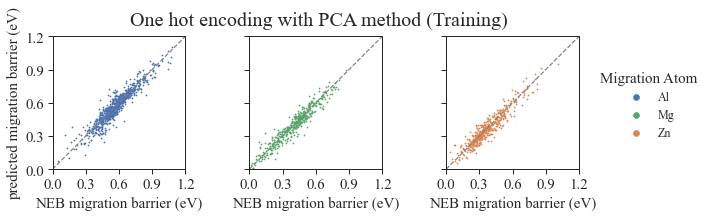

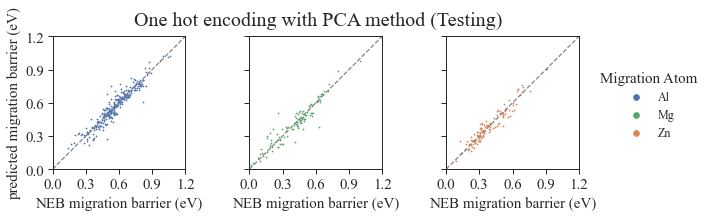

In [19]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_train, col='migration_atom', hue='migration_atom', legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'migration_barriers', 'predicted_barrier', alpha=1, s=1, marker='8')
g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
                 scatterpoints=1, label_order=ele_list, prop={'size': 12})
g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('predicted migration barrier (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB migration barrier (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df_train['migration_barriers'], df_train['predicted_barrier'])))
##################################################################################################################
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_test, col='migration_atom', hue='migration_atom', legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'migration_barriers', 'predicted_barrier', alpha=1, s=1, marker='8')
g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
                 scatterpoints=1, label_order=ele_list, prop={'size': 12})
g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('predicted migration barrier (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB migration barrier (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
g.fig.suptitle('One hot encoding with PCA method (Testing)', size=20)

g.savefig('barrier_pred_test.png', dpi=1000, transparent=True)

print('rmse test', np.sqrt(mean_squared_error(df_test['migration_barriers'], df_test['predicted_barrier'])))